# A/B Testing with Cookie Cats Game

Cookie Cats is a captivating puzzle game of “connect-three”-style developed by Tactile Entertainment. To be in context, this game’s main objective is to align 3 cookies of the same kind to feed a cat, and in this way finish each level. Also as collectible credit, you can earn Keys to unlock gates located at certain levels.

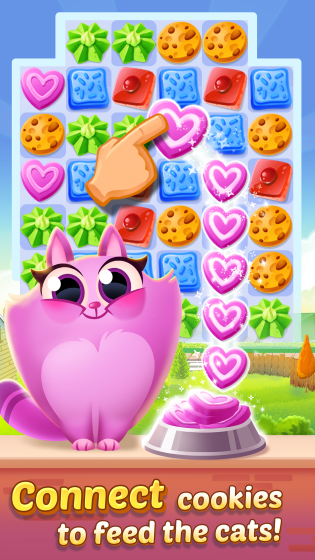

**Game Mechanics**

As players progress through the levels of the game, they will occasionally encounter gates , progression gates, that force them to wait a non-trivial amount of time or make an in-app purchase to progress. These gates serves as an effective monetization strategy. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.

**The Challenge: Gate Placement**

But where should these progression gates be placed? Initially the first gate was placed at level 30, however, could player retension be imporved by relocating this gate to other level?

Our goal is to analyze the impact of changing progression gates from level 30 to level 40 on player retention, an essential metrics for game's long-term success.

# **About the data**

This dataset was coolected from Kaggel (https://www.kaggle.com/datasets/arpitdw/cokie-cats)

This dataset contains around 90,189 records of players that started the game while the telemetry system was running, according to Rasmus Baath. Among the variables collected are the next:



*   userid : unique identification of the user.
*   version : the group in which the players were measured, for a time gate at level 30 it contains a string called gate_30, or for a time gate at level 40 it contains a string called gate_40.
*   sum_gamerounds : number of game rounds played within the first 14 days since the first session played.
*   retention_1 : Boolean that defines if the player came back 1 day after the installation.
*   retention_7 : Boolean that defines if the player came back 7 days after the installation.

Here the retention_1 is a crucial factor, since it defines if the game generate a first engagement with the first log-in of the player.

In [1]:
# Importing pandas
import pandas as pd

# Reading in the data
df = pd.read_csv('/content/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Data Preprocessing

Before starting the analysis we need to do some validations on the dataset.

In [2]:
# Count and display the number of unique players
print("Number of players: ", df.userid.nunique(), '\n',
        "Number of records: ", len(df.userid),'\n')

Number of players:  90189 
 Number of records:  90189 



It’s not common to find this kind of data, cause as we saw the data is almost ideally sampled, where we count just with distinct records.

# Data Cleaning

The data doesn’t require any kind of transformation and the data types are aligned with their purpose.

In [3]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

# Data Consistency

The usability of the data it’s rather good, since we don’t count with “NAN” (Not A Number), “NA” (Not Available), or “NULL” (an empty set) values

In [4]:
# Function the plot the percentage of missing values
def na_counter(df):
    print("NaN Values per column:")
    print("")
    for i in df.columns:
        percentage = 100 - ((len(df[i]) - df[i].isna().sum())/len(df[i]))*100

        # Only return columns with more than 5% of NA values
        if percentage > 5:
            print(i+" has "+ str(round(percentage)) +"% of Null Values")
        else:
            continue

# Execute function
na_counter(df)

NaN Values per column:



By this, we can conclude that there were not errors in our data during the data collection

# Normalization
Noticing the distribution of the quartiles and comprehending the purpose of our analysis, where we only require sum_gamerounds as numeric, we can validate that the data is comparable and doesn’t need transformations

In [5]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


## Exploratory Data Analysis & In-game interpretations

**Summary statistics**

We got the next conclusions about their distribution and measurement:

1.   userId
     *   Interpretation: Player identifier with distinct records in the whole dataset which can be transformed as a factor.
     *   Data type: Nominal
     *   Measurement type: Discrete/String

2.   version
     *  Interpretation: Just two possible values to evaluate, time gate at level 30 or level 40.
     *  Data type: Ordinal
     *  Measurement type: Discrete/String

3.   sum_gamerounds
    *  Interpretation: Number of game rounds played by the user, where 50% of the users played between 5 and 51 sessions.
    *  Data type: Numerical
    *  Measurement type: Integer
4.  retention_1
    *  Interpretation: Boolean measure to verify that the player retention was effective for 1 day at least.
    *  Data type: Nominal
    *  Measurement type: Discrete/String
5.  retention_7
    *  Interpretation: Boolean measure to verify that the player retention was effective for 7 days at least.
    *  Data type: Nominal
    *  Measurement type: Discrete/String

**Strategy of Analysis**

The most accurate way to test changes is to perform A/B testing by targeting a specific variable, in the case retention (for 1 and 7 days after installation).

As we mentioned before, we have two groups in the version variable:

*  Control group: The time gate is located at level 30. We are going to consider this one as a no-treatment group.
*  Treatment group: The company plans to move the time gate to level 40. We are going to use this as a subject of study, due to the change involved.


In an advanced stage, we are going to perform a bootstrapping technique, to be confident about the result comparison for the retention probabilities between groups.

In [6]:
# Counting the number of players in each AB group.
players_g30 = df[df['version'] == 'gate_30']
players_g40 = df[df['version'] == 'gate_40']

print('Number of players tested at Gate 30:', str(players_g30.shape[0]), '\n',
     'Number of players tested at Gate 40:', str(players_g40.shape[0]))

Number of players tested at Gate 30: 44700 
 Number of players tested at Gate 40: 45489


# Game rounds distribution

As we see the proportion of players sampled for each group is balanced, so for now, only exploring the Game Rounds data is in the queue.

Let’s see the distribution of Game Rounds

In [7]:
import plotly.express as px

# Custom layout settings
custom_layout = {
    'height': 720,
    'width': 1000,
    'font': {
        'size': 15
    },
    'title': {
        'text': "Game Rounds Overall Distribution by Player",
        'x': 0.5
    }
}

# Create box plot
box1 = px.box(df, x="sum_gamerounds", labels={"sum_gamerounds": "Game Rounds registered"})

# Update layout manually
box1.update_layout(custom_layout)

# Show plot
box1.show()

For now, we see that there exist clear outliers in the dataset since one user has recorded 49,854 Game rounds played in less than 14 days, meanwhile, the max recorded, excluding the outlier, is around 2,900.

This could be attribute to “bot”, a “bug” or a “glitch” in the dataset. Nevertheless, it’s preferable to clean it, since only affected one record.

In [8]:
# Cleaning the dataset by removing a record.

df = df[df['sum_gamerounds'] != 49854]

In [12]:
import numpy as np
import plotly.graph_objects as go

# ECDF Generator function (Empirical Cumulative Distribution Function) for on dimension arrays
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Generate ECDF data
x_rounds, y_rounds = ecdf(df['sum_gamerounds'])

# Generate percentile markers
percentiles = np.array([5, 25, 50, 75, 95])
ptiles = np.percentile(df['sum_gamerounds'], percentiles)

# Custom layout settings
layout = {
    'height': 480,
    'width': 720,
    'font': {
        'size': 15
    },
    'title': {
        'text': "Game Rounds Cumulative Distribution Plot",
        'x': 0.5
    },
    'xaxis': {
        'title': 'Game Rounds Registered'
    },
    'yaxis': {
        'title': 'Cumulative Probability'
    }
}

# Create ECDF plot
ecdf_fig = go.Figure()

# Add traces
ecdf_fig.add_trace(go.Scatter(x=x_rounds, y=y_rounds,
                              mode='markers',
                              name='Game Rounds'))
ecdf_fig.add_trace(go.Scatter(x=ptiles, y=percentiles/100,
                              mode='markers+text',
                              name='Percentiles', marker_line_width=2, marker_size=10,
                              text=percentiles, textposition="bottom right"))

# Update layout
ecdf_fig.update_layout(layout)

# Show plot
ecdf_fig.show()


We can see 95% of our data is below 500 Game Rounds

In [10]:
print("The 95 percentile of the data is at: ", ptiles[4], "Game Rounds","\n",
"This means ", df[df["sum_gamerounds"] <= ptiles[4]].shape[0], " players")

The 95 percentile of the data is at:  221.0 Game Rounds 
 This means  85706  players


In the plot above, we saw some players that installed the game but, then never return (0 game rounds).

In [13]:
print("Players inactive since installation: ", df[df["sum_gamerounds"] == 0].shape[0])

Players inactive since installation:  3994


And in most cases, players just play a couple of game rounds in their first two weeks. But, we are looking for players that like the game and to get hooked, that’s one of our interests.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention as mentioned before.

# Player retention model

Retention is the percentage of players that come back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

So, the first step is to know the overall 1-day retention

In [14]:
# The % of users that came back the day after they installed
prop = len(df[df['retention_1'] == True]) / len(df['retention_1']) * 100

print("The overall retention for 1 day is: ", str(round(prop,2)),"%")

The overall retention for 1 day is:  44.52 %


Less than half of the players come back one day after installing the game.

Now that we have a benchmark, let’s look at how 1-day retention differs between the two AB groups.

# 1-day retention by A/B Group


In [16]:
# Calculating 1-day retention for each AB-group

# CONTROL GROUP
prop_gate30 = len(players_g30[players_g30['retention_1'] == True])/len(players_g30['retention_1']) * 100

# TREATMENT GROUP
prop_gate40 = len(players_g40[players_g40['retention_1'] == True])/len(players_g40['retention_1']) * 100

print('Group 30 at 1 day retention: ',str(round(prop_gate30,2)),"%","\n",
     'Group 40 at 1 day retention: ',str(round(prop_gate40,2)),"%")

Group 30 at 1 day retention:  44.82 % 
 Group 40 at 1 day retention:  44.23 %


It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.23%) compared to the control when it was at level 30 (44.82%).

It’s a smallish change, but even small changes in retention can have a huge impact. While we are sure of the difference in the data, how confident should we be that a gate at level 40 will be more threatening in the future?

For this reason, it’s important to consider bootstrapping techniques, this means “a sampling with replacement from observed data to estimate the variability in a statistic of interest”. In this case, retention, and we are going to do a function for that.

In [17]:
# Bootstrapping Function
'''To generate multiple bootstrap sample from original dataset'''
def draw_bs_reps(data,func,iterations=1):
    boot_Xd = []
    for i in range(iterations):
        boot_Xd.append(func(data = np.random.choice(data, len(data))))
    return boot_Xd

# Retention Function
'''To calculate retention rate'''
def retention(data):
    ret = len(data[data == True])/len(data)
    return ret

 **Control Group Bootstrapping**

In [20]:
# Bootstrapping for gate 30
btg30_1d = draw_bs_reps(players_g30['retention_1'], retention, iterations = 1000)



**Treatment Group Bootstrapping**

In [21]:
# Bootstrapping for gate 40
btg40_1d = draw_bs_reps(players_g40['retention_1'], retention, iterations = 1000)


In [23]:
import plotly.figure_factory as ff

mean_g40 = np.mean(btg40_1d)
mean_g30 = np.mean(btg30_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d = pd.DataFrame(data = {'gate_30':btg30_1d, 'gate_40':btg40_1d},
                       index = range(1000))

#Defining the annotation
sign = {
    'x': 0.445,  # x-coordinate of the annotation
    'y': 0.5,  # y-coordinate of the annotation
    'xref': "x",
    'yref': "paper",
    'text': "Mean difference",
    'showarrow': True,
    'arrowhead': 2,
    'ax': 0,
    'ay': -40
}

# Plotting histogram
hist_1d = [boot_1d.gate_30, boot_1d.gate_40]
dist_1d = ff.create_distplot(hist_1d, group_labels=["Gate 30 (Control)", "Gate 40 (Treatment)"], show_rug=False, colors = ['#3498DB','#28B463'])
dist_1d.add_vline(x=mean_g40, line_width=3, line_dash="dash", line_color="#28B463")
dist_1d.add_vline(x=mean_g30, line_width=3, line_dash="dash", line_color="#3498DB")
dist_1d.add_vrect(x0=mean_g30, x1=mean_g40, line_width=0, fillcolor="#F1C40F", opacity=0.2)

dist_1d.update_layout(layout)
dist_1d.update_layout(xaxis_range=[0.43,0.46])
dist_1d.update_layout(title='1-Day Retention Bootstrapping by A/B Group', xaxis_title="Retention")
dist_1d.add_annotation(sign)
dist_1d.show()


The difference still looking close, for this reason, is preferable to zoom it by plotting the difference as an individual measure.

In [25]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (
                    ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']) * 100
                )

# Ploting the bootstrap % difference
hist_1d_diff = [boot_1d['diff']]
dist_1d_diff = ff.create_distplot(hist_1d_diff, show_rug=False, colors = ['#F1C40F'],
                                    group_labels = ["Gate 30 - Gate 40"], show_hist=False)
dist_1d_diff.add_vline(x= np.mean(boot_1d['diff']), line_width=3, line_dash="dash", line_color="black")
dist_1d_diff.update_layout(layout)
dist_1d_diff.update_layout(xaxis_range=[-3,6])
dist_1d_diff.update_layout(title='Percentage of "1 day retention" difference between A/B Groups', xaxis_title="% Difference")
dist_1d_diff.add_annotation(sign)
dist_1d_diff.show()

From this chart, we can see that the percentual difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 30.

But, what is the probability that the difference is above 0%? Let’s calculate that as well.

In [26]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0.0).sum() / len(boot_1d['diff'])

# Pretty printing the probability
print('The probabilty of Group 30 (Control) having a higher \n retention than Group 40 (Treatment) is: ', prob*100, '%')


The probabilty of Group 30 (Control) having a higher 
 retention than Group 40 (Treatment) is:  96.89999999999999 %


# 7-day retention by A/B Group

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the time gate is at level 30. However, since players have only been playing the game for one day, likely, most players haven’t reached level 30 yet. That is, many players won’t have been affected by the gate, even if it’s as early as level 30.

But after having played for a week, more players should have reached level 40, and therefore it makes sense to also look at 7-day retention.

So the question is: What percentage of the people that installed the game also showed up a week later to play the game again?


In [27]:
# Calculating 7-day retention for both AB-groups
ret30_7d = len(players_g30[players_g30['retention_7'] == True])/len(players_g30['retention_7']) * 100
ret40_7d = len(players_g40[players_g40['retention_7'] == True])/len(players_g40['retention_7']) * 100

print('Group 30 at 7 day retention: ',str(round(ret30_7d,2)),"%","\n",
     'Group 40 at 7 day retention: ',str(round(ret40_7d,2)),"%")

Group 30 at 7 day retention:  19.02 % 
 Group 40 at 7 day retention:  18.2 %


Like with 1-day retention, we see that 7-day retention is barely lower (18.20%) when the gate is at level 40 than when the time gate is at level 30 (19.02%). However this difference is also larger than for 1-day retention.

We can also see that the overall 7-day retention is lower than the overall 1-day retention meaning fewer people play a game a week than a day after installing.

But as before, let’s use bootstrap analysis to figure out how sure we can be of the difference between the AB-groups.

**Control & Treatment Group Bootstrapping**

In [28]:
# Creating a list with bootstrapped means for each AB-group

# Bootstrapping for CONTROL group
btg30_7d = draw_bs_reps(players_g30['retention_7'], retention, iterations = 500)

# Bootstrapping for TREATMENT group
btg40_7d = draw_bs_reps(players_g40['retention_7'], retention, iterations = 500)

boot_7d = pd.DataFrame(data = {'gate_30':btg30_7d, 'gate_40':btg40_7d},
                       index = range(500))

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

# Ploting the bootstrap % difference
hist_7d_diff = [boot_7d['diff']]
dist_7d_diff = ff.create_distplot(hist_7d_diff, show_rug=False, colors = ['#FF5733'],
                                    group_labels = ["Gate 30 - Gate 40"], show_hist=False)
dist_7d_diff.add_vline(x= np.mean(boot_7d['diff']), line_width=3, line_dash="dash", line_color="black")
dist_7d_diff.update_layout(layout)
dist_7d_diff.update_layout(xaxis_range=[-4,12])
dist_7d_diff.update_layout(title='Percentage of "7 day retention" difference between A/B Groups', xaxis_title="% Difference")
dist_7d_diff.add_annotation(sign)
dist_7d_diff.show()

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)

# Pretty printing the probability
print('The probabilty of Group 30 (Control) having a higher \n retention than Group 40 (Treatment) is: ~', prob*100, '%')

The probabilty of Group 30 (Control) having a higher 
 retention than Group 40 (Treatment) is: ~ 100.0 %


# RESULT AND CONCLUSION

**What can the stakeholders understand and take in consideration?**

As we underlined retention is crucial for long-term success of game, because if we don’t retain our player base, it doesn’t matter how much money they spend in-game purchases.

So, why is retention higher when the gate is positioned earlier? Normally, we could expect the opposite: The later the obstacle, the longer people get engaged with the game. But this is not what the data tells us, a pausible reason could be, players might initially feel excited and challenged by obstacles, but over time, they may become accustomed to the game’s difficulty and derive less enjoyment from it.

An obstacle at level 30 introduces a significant challenge early in the game, which can hook players by providing an immediate sense of achievement and progression. Introducing significant challenges too late (like at level 40) might lead to player fatigue or burnout.


**What could the stakeholders do to take action?**

Now we have enough statistical evidence to say that 7-day retention is higher when the gate is at level 30 than when it is at level 40, the same as we concluded for 1-day retention. If we want to keep consumer retention high, we should not move the gate from level 30 to level 40, it means we keep our Control method in the current gate system.

**What can stakeholders keep working on?**

For coming strategies the Game Designers can consider that, by pushing players to take a break when they reach a gate, the fun of the game is postponed. But, when the gate is moved to level 40, they are more likely to quit the game because they simply got bored of it.
